In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
raw_train_data = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
raw_test_data = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

In [119]:
train_data = raw_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data = raw_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 102.6+ KB


### Null 있는지 확인
'Age'에 177개 <br>
'Embarked'에 2개 null확인됬음. 

In [35]:
print(train_data['Age'].isnull().sum())
print(train_data['Embarked'].isnull().sum())

177
2


### Value Counts for Categorical Data

In [56]:
category_list = ['Survived', 'Pclass', 'Sex', 'Embarked']
for i in category_list:
    print(i,' Value Counts')
    counts = train_data[i].value_counts()
    print(counts)
    if(counts.sum() != 891):
        print('This Data has', 891-counts.sum() ,'null value')
    print('---------------------')

Survived  Value Counts
0    549
1    342
Name: Survived, dtype: int64
---------------------
Pclass  Value Counts
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------------
Sex  Value Counts
male      577
female    314
Name: Sex, dtype: int64
---------------------
Embarked  Value Counts
S    644
C    168
Q     77
Name: Embarked, dtype: int64
This Data has 2 null value
---------------------


In [55]:
train_data['Pclass'].value_counts().sum()

891

### Describe for Numerical Data

In [60]:
train_data[['Age', 'SibSp', 'Parch', 'Fare']].describe()

Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb24630e10>,
      dtype=object)

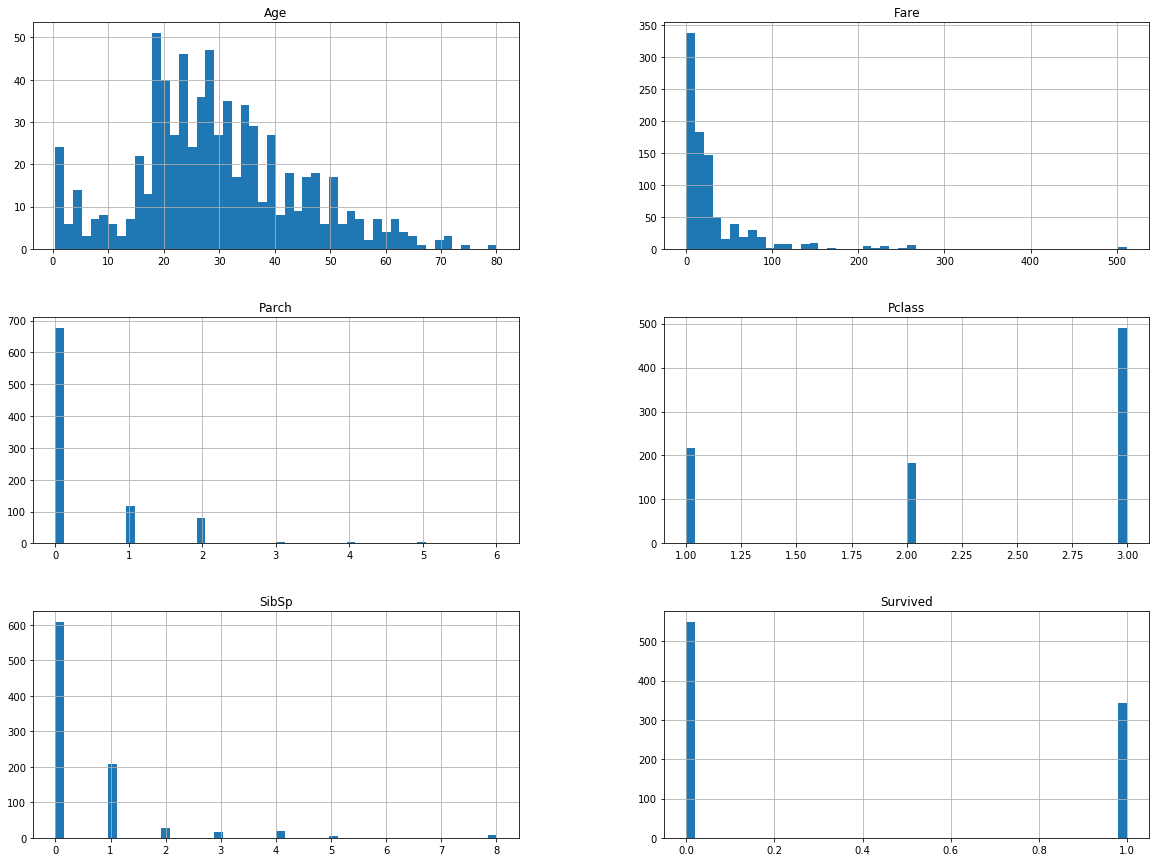

In [70]:
train_data.hist(bins=50, figsize=(20, 15))

### Correlation Coefficients

In [72]:
test_data.corr()

Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age    -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp   0.001087 -0.091587  1.000000  0.306895  0.171539
Parch   0.018721 -0.061249  0.306895  1.000000  0.230046
Fare   -0.577147  0.337932  0.171539  0.230046  1.000000

In [94]:
for i in train_data['Sex'].value_counts().index:
    for j in train_data['Embarked'].value_counts.index:
        

1
2


In [101]:
len(train_data['Sex'].value_counts().index)

2

In [84]:
train_data_1.head()

PassengerId
1    3.0
2    1.0
3    3.0
4    3.0
5    3.0
Name: Embarked, dtype: float64

In [114]:
train_data_1=train_data
train_data_1['Sex']=train_data['Sex'].replace({'male':1 ,'female': 2})
train_data_1['Embarked']=train_data_1['Embarked'].replace({'C': 1, 'Q':2, 'S':3})

In [122]:
train_data_1.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked -0.169718  0.164681 -0.110320 -0.032565  0.068900  0.040449   

              Fare  Embarked  
Survived  0.257307 -0.169718  
Pclass   -0.549500  0.164681  
Sex       0.182333 -0.110320  
Age       0.096067 -0.032565  
SibSp     0.159651  0.068900  
Parch     0.216225  0.040449  
Fare      1.000000 -0.226311  
Embarked -0.226311  1.000000

In [129]:
train_data.groupby('Sex').sum()

Survived  Pclass       Age  SibSp  Parch        Fare
Sex                                                         
female       233     678   7286.00    218    204  13966.6628
male         109    1379  13919.17    248    136  14727.2865

In [139]:
#Number of non-null observations
train_data.groupby('Sex').count()

Survived  Pclass  Age  SibSp  Parch  Fare  Embarked
Sex                                                        
female       314     314  261    314    314   314       312
male         577     577  453    577    577   577       577

**Insight 1** 
여자는 대부분 살고 남자는 대부분 죽었음. 

In [143]:
train_data.groupby('Pclass').sum()['Survived'] / train_data.groupby('Pclass').count()['Survived']


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Insight 2** 
1등석이 확실히 더 많이 살았음.

In [154]:
train_data.groupby('Embarked').sum()['Survived'] / train_data.groupby('Embarked').count()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

**Insight 3** 
Cherbourg에서 승선한 사람은 50% 넘게 살았음 <br>
출구 쪽에 있었나?<br>
혹시 가장 마지막에 탑승했거나, 비상구에서 가까운 쪽에 위치하고 있었나?

In [155]:
print(train_data.groupby('SibSp').sum()['Survived'] / train_data.groupby('SibSp').count()['Survived'])
print(train_data.groupby('Parch').sum()['Survived'] / train_data.groupby('Parch').count()['Survived'])


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


이건 딱히 얻을게 있는지 잘 모르겠다. 

In [159]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [196]:
bins = [x for x in range(-1, 81, 10)]

In [199]:
train_data_with_ages = train_data
train_data_with_ages['cut'] = pd.cut(train_data_with_ages['Age'],
                              bins=bins, include_lowest = True)

In [200]:
print(train_data_with_ages.groupby('cut').sum()['Survived'] / train_data.groupby('cut').count()['Survived'])

cut
(-1.001, 9.0]    0.612903
(9.0, 19.0]      0.401961
(19.0, 29.0]     0.350000
(29.0, 39.0]     0.437126
(39.0, 49.0]     0.382022
(49.0, 59.0]     0.416667
(59.0, 69.0]     0.315789
(69.0, 79.0]     0.000000
Name: Survived, dtype: float64


**나이대 별로 보면** 애기들이 확실히 더 많이 살긴 했는데 유의미한지는 잘 모르겠음. 

# 여기까지 9월 23일 일요일
시간: PM 5:20 ~ 6:30

## Data Preprocessing For Maching Learning